# Clean GDP data
We would like to compare unemployment numbers with GDP data. The data here comes from the OECD. https://data.oecd.org/gdp/gross-domestic-product-gdp.htm

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  

BASE = os.path.join(os.pardir, "data")

In [3]:
# Open file
filename = "GDP_data.csv"
df = pd.read_csv(os.path.join(BASE, "other_raw_data", filename))

df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,MLN_USD,A,1960,25034.740,NaN
1,AUS,GDP,TOT,MLN_USD,A,1961,25326.382,NaN
2,AUS,GDP,TOT,MLN_USD,A,1962,27913.206,NaN
3,AUS,GDP,TOT,MLN_USD,A,1963,30385.723,NaN
4,AUS,GDP,TOT,MLN_USD,A,1964,32694.467,NaN


In [4]:
# Check what countries are in the dataset
df["LOCATION"].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'CHN', 'COL', 'EST', 'IND', 'IDN',
       'ISR', 'RUS', 'SVN', 'ZAF', 'DEW', 'EU28', 'OECD', 'OECDE', 'LVA',
       'BRA', 'LTU', 'SAU', 'EA19', 'ARG', 'CRI', 'BGR', 'HRV', 'CYP',
       'MLT', 'PER', 'ROU', 'MKD', 'ZMB', 'HKG', 'MDG', 'MAR', 'SGP'],
      dtype=object)

In [5]:
# Drop everything except Greece, Germany and EU28
keep = ["DEU", "GRC", "EU28"]
outside = [_ for _ in df["LOCATION"].unique() if _ not in keep]

df.drop(df.loc[df["LOCATION"].isin(outside)].index, inplace=True)

In [6]:
# Use country codes as in other files
df["LOCATION"] = df["LOCATION"].replace({"GRC": "EL", "DEU": "DE"})

In [7]:
# Keep only USD per capita
df.drop(df.loc[df["MEASURE"] == "MLN_USD"].index, inplace=True)

In [8]:
# Drop columns
cols = ["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"]

# And narrow down the timeframe
df = (df[df["TIME"].between(2005, 2020)]
      .drop(columns=cols)
      .reset_index(drop=True))

In [9]:
# Round values as integer
df["Value"] = df["Value"].astype("int64")

In [10]:
# Clean up column names
df.columns = df.columns.str.lower()
df.rename(columns={"location": "geo"}, inplace=True)

In [11]:
# Change the table to have countries as columns, years as rows
df = df.pivot(index="time", columns="geo", values="value")

In [12]:
# Drop index names
df.columns.name = ""
df.index.name = ""

In [13]:
df.head()

,DE,EL,EU28
,,,
2005,32236,25577,27583
2006,34624,28514,29849
2007,36820,29289,31628
2008,38432,30855,33065
2009,37501,30388,32277


## Visualize in graph

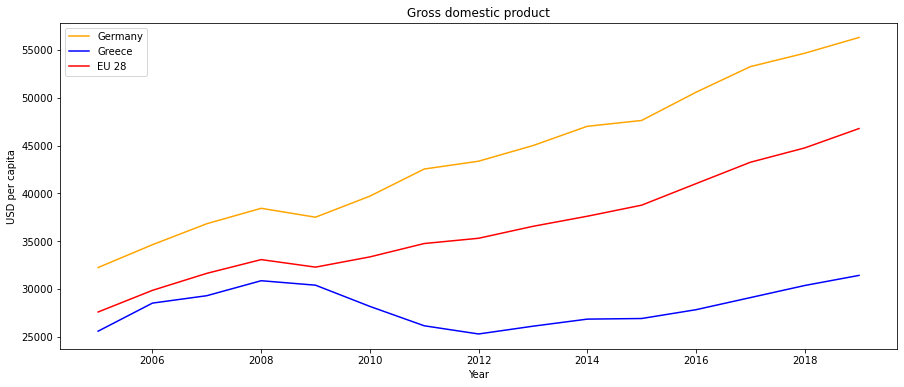

In [15]:
# Set variables
colors = ["orange", "blue", "red"]
names = {0: "Germany", 1: "Greece", 2: "EU 28"}

fig, ax = plt.subplots(figsize=(15,6))

# Do the plot
for i, country in enumerate(df.columns):
    ax.plot(country, data=df, label=names[i], color=colors[i])

# Set labels
ax.set_title("Gross domestic product")
ax.set_xlabel("Year")
ax.set_ylabel("USD per capita")
ax.legend()

In [16]:
# Export
df.to_pickle(os.path.join(BASE, "pickles", "GDP_DE_EL_EU.pkl"))